In [5]:
%pip install pandas
%pip install matplotlib.pyplot
%pip install seaborn
%pip install numpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('C:/Logiciels/Code/Git/Git_Projects/cautious-fiesta/netflix_titles.csv')

In [10]:
df.value_counts()

show_id  type   title                        director            cast                                                                                                                                                                       country                                        date_added          release_year  rating  duration  listed_in                                           description                                                                                                                                            
s997     Movie  HOMUNCULUS                   Takashi Shimizu     Go Ayano, Ryo Narita, Yukino Kishii, Anna Ishii, Seiyo Uchino                                                                                                              Japan                                          April 22, 2021      2021          TV-MA   116 min   Horror Movies, International Movies, Thrillers      Truth and illusion blurs when a homeless amnesiac awakens from an experime

In [11]:
df.shape

(8807, 12)

In [12]:
df.size

105684

In [13]:
df.describe(include=['object'])

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [14]:
df['show_id'].nunique()

8807

In [15]:
df.set_index('show_id',inplace=True)

In [ ]:
df[df.duplicated()]
duplicate_rows = df.duplicated().sum()
duplicate_rows

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8807 entries, s1 to s8807
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          8807 non-null   object
 1   title         8807 non-null   object
 2   director      6173 non-null   object
 3   cast          7982 non-null   object
 4   country       7976 non-null   object
 5   date_added    8797 non-null   object
 6   release_year  8807 non-null   int64 
 7   rating        8803 non-null   object
 8   duration      8804 non-null   object
 9   listed_in     8807 non-null   object
 10  description   8807 non-null   object
dtypes: int64(1), object(10)
memory usage: 1.1+ MB


In [20]:
df.isnull().sum().sum()

np.int64(4307)

In [22]:
print('cast column:',df['cast'].isnull().sum(),'valeurs nul')
print('director column:',df['director'].isnull().sum(),'valeurs nul')
print('country column:',df['country'].isnull().sum(),'valeurs nul')

cast column: 825 valeurs nul
director column: 2634 valeurs nul
country column: 831 valeurs nul


In [25]:
# on replace les valeurs null par inconnu
df[["director", "cast", "country"]] = df[["director", "cast", "country"]].replace(np.nan, 'inconnu')
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [26]:
df.dropna(subset=['rating','duration','date_added'],inplace =True) 
df

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,Unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,Unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
s8804,TV Show,Zombie Dumb,Unknown,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [27]:
df.isnull().sum()

type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [28]:
df['date_added'].dtype

dtype('O')

In [ ]:
#date format date
df['date_added']=df['date_added'].apply(pd.to_datetime)
df['date_added'].dtype
df['loading_year']=df['date_added'].dt.year
df['loading_year']
df['loading_Month']=df['date_added'].dt.month_name()
df['loading_Month']

dtype('<M8[ns]')

In [32]:
df.describe(include=['int'])

,release_year,loading_year
count,8790.000000,8790.000000
mean,2014.183163,2018.873606
std,8.825466,1.573568
min,1925.000000,2008.000000
25%,2013.000000,2018.000000
50%,2017.000000,2019.000000
75%,2019.000000,2020.000000
max,2021.000000,2021.000000


In [33]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [ ]:
#split la str Xmin en X et min
df[['Minutes','Units']]=df['duration'].str.split(' ',expand=True)
# converti en minutes
df[['Minutes','Units']]=df['duration'].str.split(' ',expand=True)
df['Minutes'].astype(int)

In [36]:
df_temp=df[['loading_year','release_year']]
df_temp

,loading_year,release_year
show_id,,
s1,2021,2020
s2,2021,2021
s3,2021,2021
s4,2021,2021
s5,2021,2021
...,...,...
s8803,2019,2007
s8804,2019,2018
s8805,2019,2009


In [49]:
# visualisé les relation des data
plt.figure(figsize=(12,8))
sns.heatmap(df_temp.corr(), annot=True)
plt.show()

TypeError: Series.corr() missing 1 required positional argument: 'other'

<Figure size 1200x800 with 0 Axes>

In [38]:
df['loading_year'].value_counts().reset_index(name='count')

,loading_year,count
0,2019,2016
1,2020,1879
2,2018,1648
3,2021,1498
4,2017,1185
5,2016,426
6,2015,82
7,2014,24
8,2011,13
9,2013,11


In [45]:
"""plt.figure(figsize=(11,7))
sns.histplot(data=df,x='loading_year',bins=25,kde=True,color='blue')
plt.title("Distribution The Loading year ")
plt.xlabel('Loading Year')
plt.ylabel('Frequency')
plt.show()"""

'plt.figure(figsize=(11,7))\nsns.histplot(data=df,x=\'loading_year\',bins=25,kde=True,color=\'blue\')\nplt.title("Distribution The Loading year ")\nplt.xlabel(\'Loading Year\')\nplt.ylabel(\'Frequency\')\nplt.show()'

In [46]:
"""df_temp=df['release_year'].sort_values().head(150)
sns.set(style='whitegrid')
plt.figure(figsize=(10,6))
sns.countplot(x=df_temp,palette='plasma')
plt.xlabel('Loading year')
plt.ylabel('Count')
plt.title('Distribution The Realease Year')
plt.xticks(rotation=90)
plt.show()"""

"df_temp=df['release_year'].sort_values().head(150)\nsns.set(style='whitegrid')\nplt.figure(figsize=(10,6))\nsns.countplot(x=df_temp,palette='plasma')\nplt.xlabel('Loading year')\nplt.ylabel('Count')\nplt.title('Distribution The Realease Year')\nplt.xticks(rotation=90)\nplt.show()"

In [41]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [42]:
type_counts=df.groupby('type')['type'].count().reset_index(name='count')
type_counts

,type,count
0,Movie,6126
1,TV Show,2664


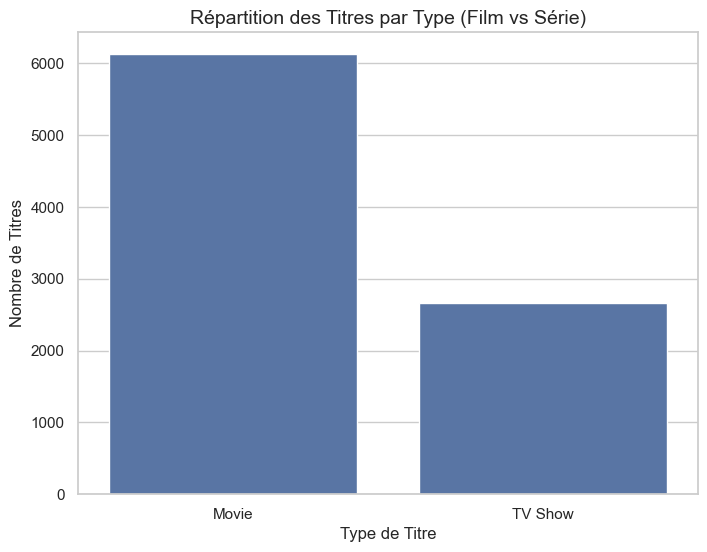

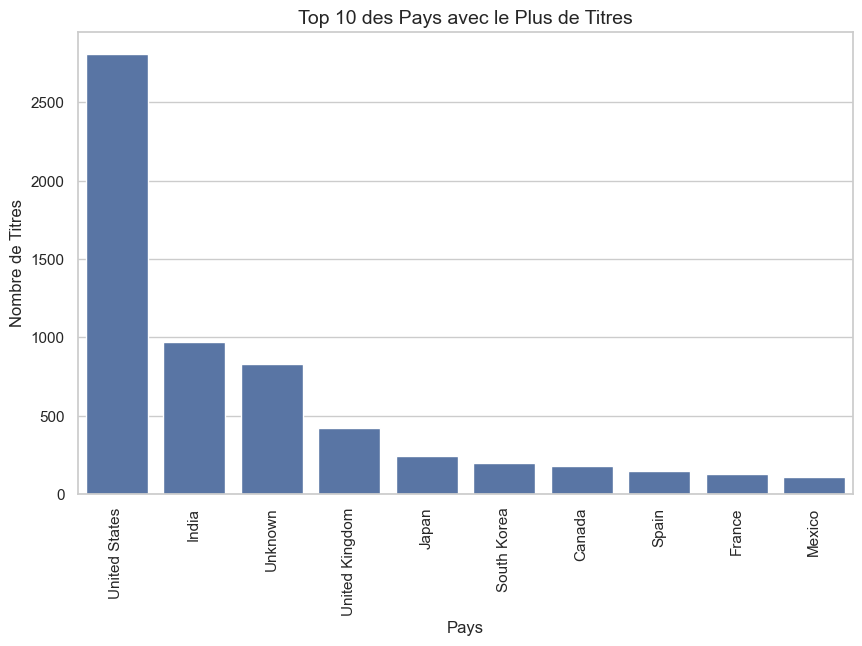

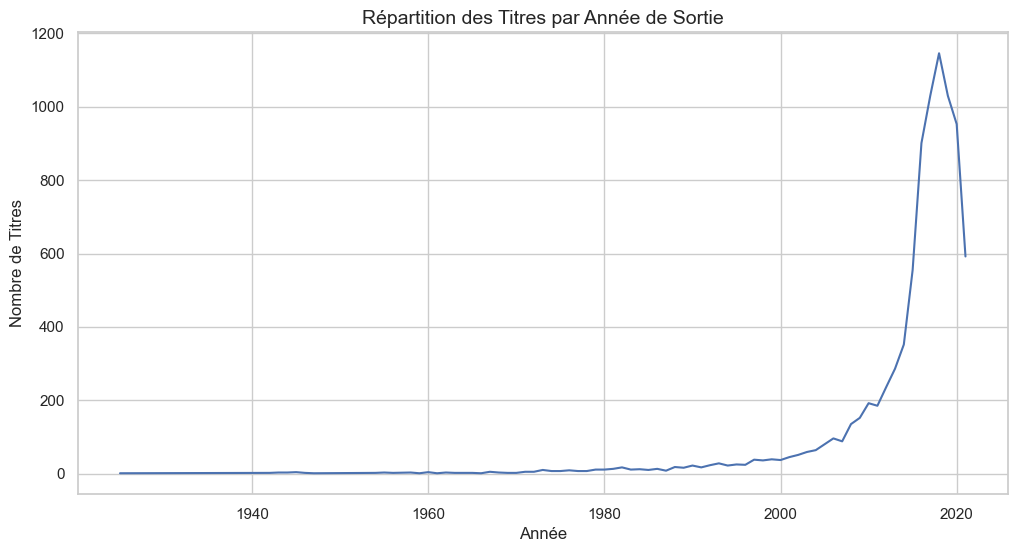

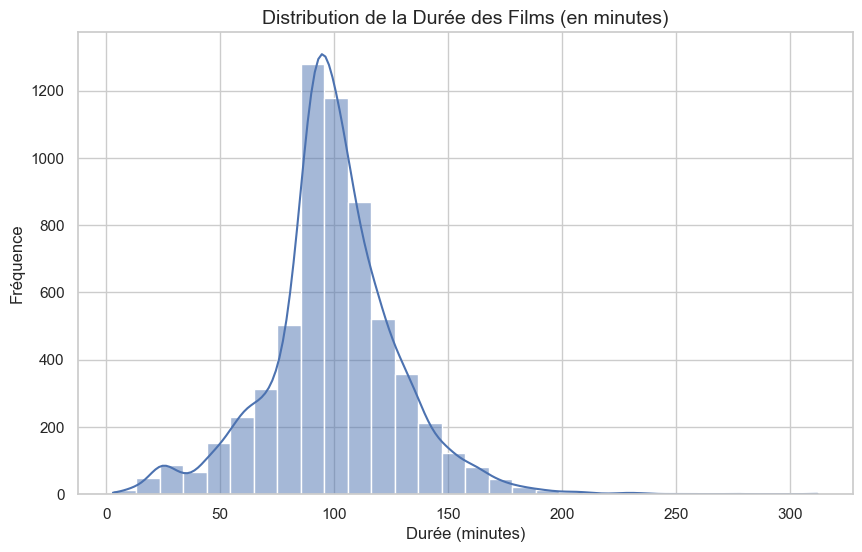

In [43]:
# Analyser la répartition des types de titres (Movie vs TV Show)
title_type_counts = df['type'].value_counts()

# Plot for Type Distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=title_type_counts.index, y=title_type_counts.values)
plt.title('Répartition des Titres par Type (Film vs Série)', fontsize=14)
plt.xlabel('Type de Titre', fontsize=12)
plt.ylabel('Nombre de Titres', fontsize=12)
plt.show()

# Analyser la répartition des titres par pays (Top 10 pays)
top_countries = df['country'].value_counts().head(10)

# Plot for Top 10 Countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 des Pays avec le Plus de Titres', fontsize=14)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Nombre de Titres', fontsize=12)
plt.xticks(rotation=90)
plt.show()

# Analyser la répartition des titres par année de sortie
release_year_counts = df['release_year'].value_counts().sort_index()

# Plot for Titles per Year
plt.figure(figsize=(12, 6))
sns.lineplot(x=release_year_counts.index, y=release_year_counts.values)
plt.title('Répartition des Titres par Année de Sortie', fontsize=14)
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de Titres', fontsize=12)
plt.show()

# Analyser la durée des films (exclure les séries)
df['duration'] = df['duration'].apply(lambda x: int(x.split(' ')[0]) if isinstance(x, str) and 'min' in x else None)

# Plot for Duration of Movies
plt.figure(figsize=(10, 6))
sns.histplot(df['duration'].dropna(), bins=30, kde=True)
plt.title('Distribution de la Durée des Films (en minutes)', fontsize=14)
plt.xlabel('Durée (minutes)', fontsize=12)
plt.ylabel('Fréquence', fontsize=12)
plt.show()

In [56]:
df['director'].value_counts().iloc[1:11]
print("les 10 directeurs qui sont cité dans le plus grand nombre de films et de séries sont:")
i=0
for name in df['director'].value_counts().iloc[1:11].index:
    i+=1
    print(i," --> il y a",name) 

les 10 directeurs qui sont cité dans le plus grand nombre de films et de séries sont:
1  --> il y a Rajiv Chilaka
2  --> il y a Raúl Campos, Jan Suter
3  --> il y a Suhas Kadav
4  --> il y a Marcus Raboy
5  --> il y a Jay Karas
6  --> il y a Cathy Garcia-Molina
7  --> il y a Jay Chapman
8  --> il y a Youssef Chahine
9  --> il y a Martin Scorsese
10  --> il y a Steven Spielberg


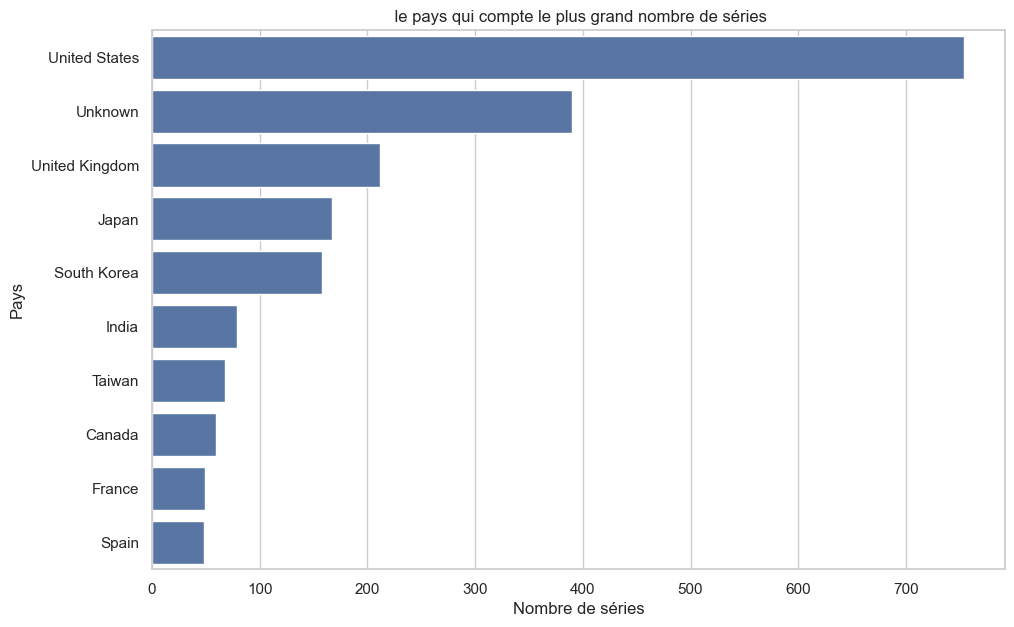

In [60]:
data = df[df['type']=='TV Show']['country'].value_counts().sort_values(ascending = False).head(10)
plt.figure(figsize=(11,7))
sns.barplot(x=data.values,y=data.index)
plt.title(' le pays qui compte le plus grand nombre de séries')
plt.xlabel('Nombre de séries')
plt.ylabel('Pays')
plt.show()